In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'text'])

# Show the first few rows
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the data
X = vectorizer.fit_transform(df['text'])
y = df['label']

print(f'Feature matrix shape: {X.shape}')

Feature matrix shape: (5572, 8444)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.99      0.90      0.94       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.98      1672



In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label='spam')
recall = recall_score(y_test, y_pred, average='binary', pos_label='spam')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='spam')

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9850
Precision: 0.9901
Recall: 0.8973
F1 Score: 0.9415


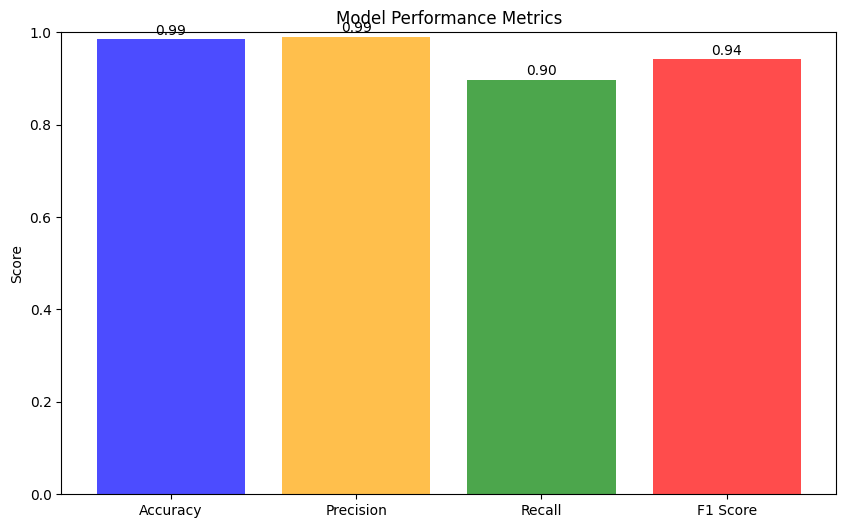

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label='spam')
recall = recall_score(y_test, y_pred, average='binary', pos_label='spam')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='spam')

# Metrics values
metrics = [accuracy, precision, recall, f1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting
x_pos = np.arange(len(metrics_names))

plt.figure(figsize=(10, 6))
plt.bar(x_pos, metrics, align='center', alpha=0.7, color=['blue', 'orange', 'green', 'red'])
plt.xticks(x_pos, metrics_names)
plt.ylabel('Score')
plt.ylim([0, 1])
plt.title('Model Performance Metrics')

# Adding the score values on top of the bars
for i in range(len(metrics)):
    plt.text(x=i, y=metrics[i] + 0.01, s=f"{metrics[i]:.2f}", ha='center')

plt.show()
